In [9]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
Train_data=pd.read_csv('train.csv')
Test_data=pd.read_csv('test.csv')

In [14]:
Train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052


In [15]:
Test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999.0,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007.0,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998.0,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007.0,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985.0,Medium,Tier 3,Supermarket Type3


In [16]:
print('Train_data:',Train_data.shape)
print('Test_data:',Test_data.shape)

Train_data: (4567, 12)
Test_data: (3834, 11)


In [19]:
Train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,3821.0,12.966425,4.660049,4.555,8.895000,12.800000,17.100000,21.350000
Item_Visibility,4566.0,0.066049,0.051294,0.000,0.026959,0.054377,0.094261,0.328391
Item_MRP,4566.0,140.836381,62.298514,31.290,93.528450,142.398300,186.350950,266.688400
Outlet_Establishment_Year,4566.0,1997.882173,8.279041,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,4566.0,2177.787909,1702.622745,33.290,833.914500,1780.349200,3078.659200,11445.102000


In [23]:
Train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   746
Item_Fat_Content                1
Item_Visibility                 1
Item_Type                       1
Item_MRP                        1
Outlet_Identifier               1
Outlet_Establishment_Year       1
Outlet_Size                  1324
Outlet_Location_Type            1
Outlet_Type                     1
Item_Outlet_Sales               1
dtype: int64

In [21]:
Test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   682
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               1
Outlet_Establishment_Year       1
Outlet_Size                  1077
Outlet_Location_Type            1
Outlet_Type                     1
dtype: int64

In [28]:
Train_data['source'] = 'train'
Test_data['source'] = 'test'
df = pd.concat([Train_data,Test_data],ignore_index=True)

In [29]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,train


In [30]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
8396,FDQ33,13.35,Low Fat,0.091131,Snack Foods,148.6708,OUT013,1987.0,High,Tier 3,Supermarket Type1,NaN,test
8397,FDE45,NaN,Low Fat,0.040162,Fruits and Vegetables,179.6002,OUT027,1985.0,Medium,Tier 3,Supermarket Type3,NaN,test
8398,FDT26,18.85,Regular,0.067897,Dairy,120.9440,OUT013,1987.0,High,Tier 3,Supermarket Type1,NaN,test
8399,NCV53,8.27,Low Fat,0.018843,Health and Hygiene,238.9880,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,NaN,test
8400,FDK60,NaN,Regular,0.093410,Baking Goods,97.6060,NaN,NaN,NaN,NaN,NaN,NaN,test


In [31]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1428
Item_Fat_Content                1
Item_Visibility                 1
Item_Type                       1
Item_MRP                        1
Outlet_Identifier               2
Outlet_Establishment_Year       2
Outlet_Size                  2401
Outlet_Location_Type            2
Outlet_Type                     2
Item_Outlet_Sales            3835
source                          0
dtype: int64

In [32]:
df.shape

(8401, 13)

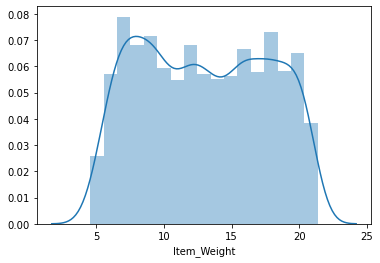

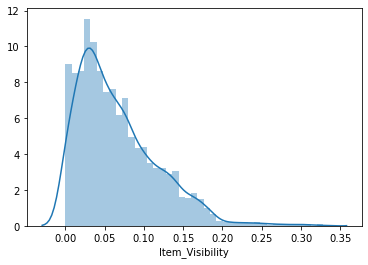

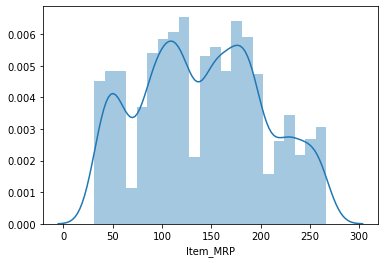

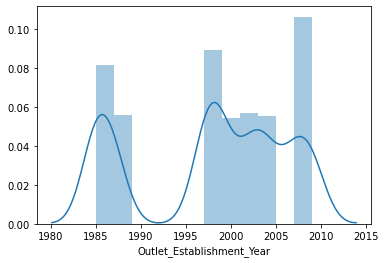

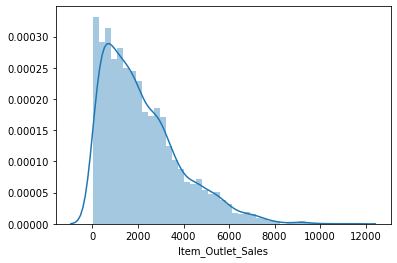

In [39]:
for i in Train_data.describe().columns:
    sns.distplot(Train_data[i].dropna())
    plt.show()

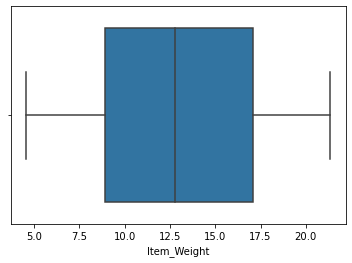

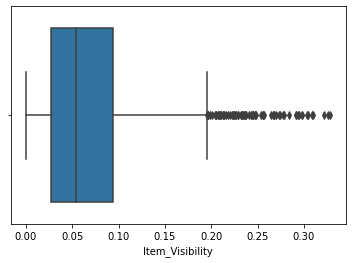

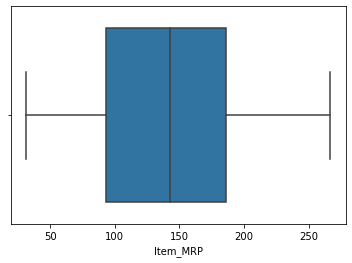

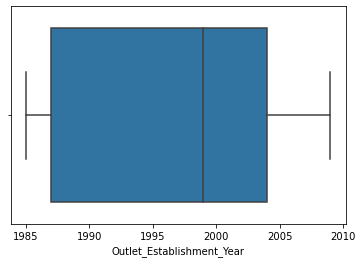

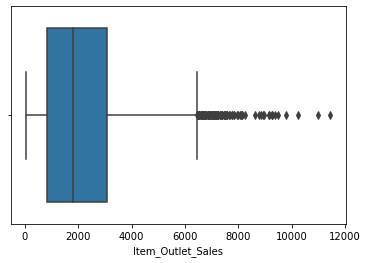

In [40]:
for i in Train_data.describe().columns:
    sns.boxplot(Train_data[i].dropna())
    plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

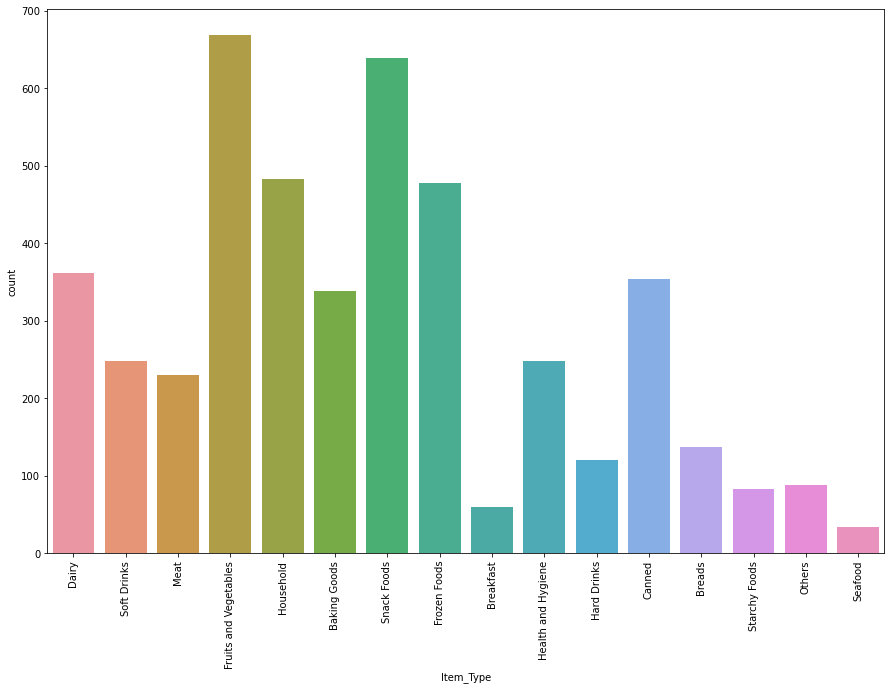

In [44]:
plt.figure(figsize=(15,10))
sns.countplot(Train_data.Item_Type)
plt.xticks(rotation=90)

In [46]:
Train_data.Item_Type.value_counts()

Fruits and Vegetables    668
Snack Foods              639
Household                483
Frozen Foods             477
Dairy                    361
Canned                   353
Baking Goods             338
Health and Hygiene       248
Soft Drinks              248
Meat                     230
Breads                   137
Hard Drinks              120
Others                    88
Starchy Foods             82
Breakfast                 60
Seafood                   34
Name: Item_Type, dtype: int64

# Distribution of the outlet_Size

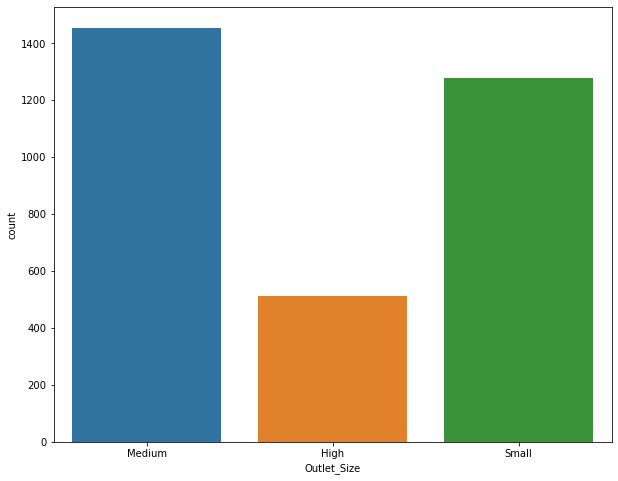

In [47]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Size)

In [48]:
Train_data.Outlet_Size.value_counts()

Medium    1455
Small     1277
High       511
Name: Outlet_Size, dtype: int64

# Distribution of the outlet_location_Type

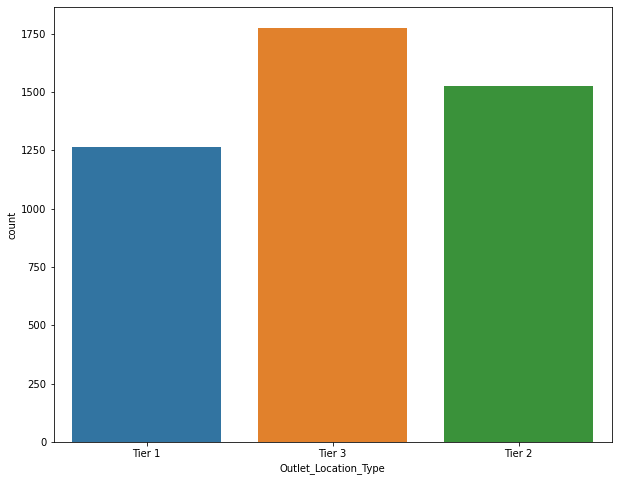

In [50]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Location_Type)

In [51]:
Train_data.Outlet_Location_Type.value_counts()

Tier 3    1775
Tier 2    1526
Tier 1    1265
Name: Outlet_Location_Type, dtype: int64

# Distribution of outlet_Type

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

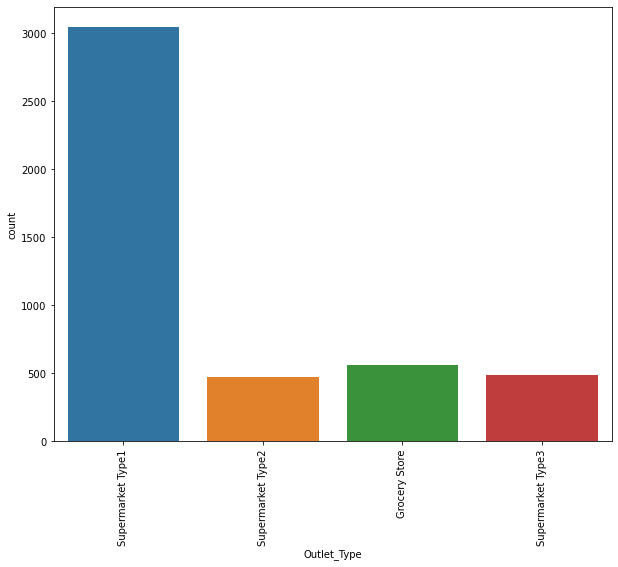

In [56]:
plt.figure(figsize=(10,8))
sns.countplot(Train_data.Outlet_Type)
plt.xticks(rotation=90)

In [57]:
Train_data.Outlet_Type.value_counts()

Supermarket Type1    3045
Grocery Store         561
Supermarket Type3     489
Supermarket Type2     471
Name: Outlet_Type, dtype: int64

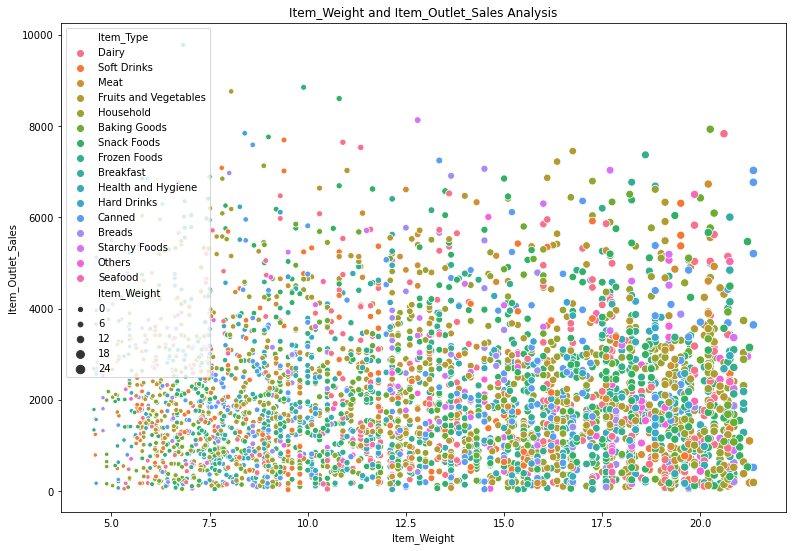

In [59]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=Train_data)

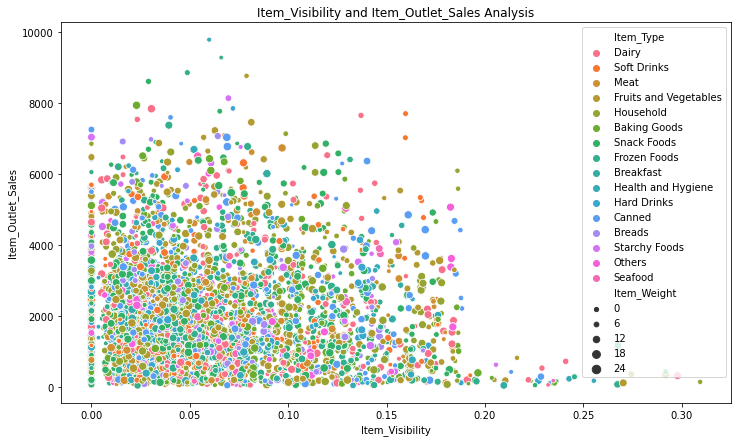

In [61]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet-Sales')
plt.title('Item_Visibility and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Visibility',y='Item_Outlet_Sales',hue='Item_Type',size='Item_Weight',data=Train_data)

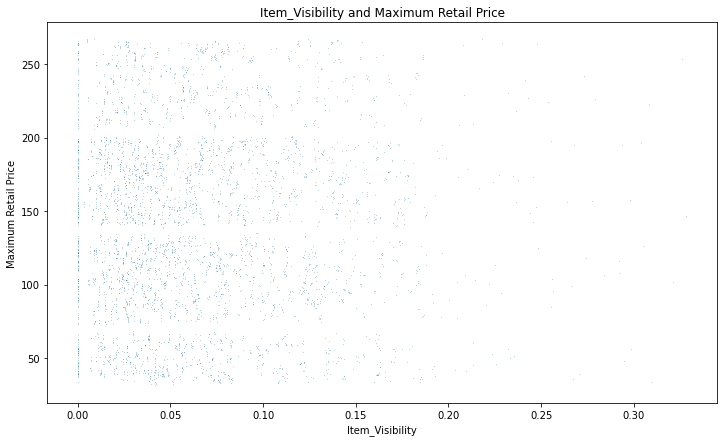

In [67]:
plt.figure(figsize=(12,7))
plt.xlabel('Item_Visibility')
plt.ylabel('Maximum Retail Price')
plt.title('Item_Visibility and Maximum Retail Price')
plt.plot(Train_data.Item_Visibility, Train_data.Item_MRP,',', alpha=0.3)

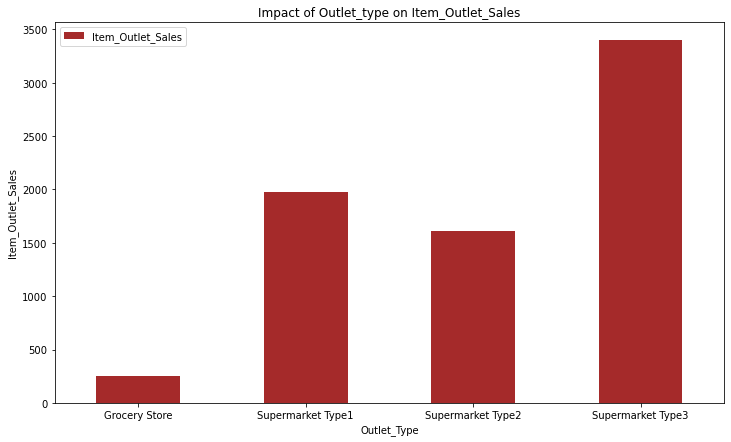

In [69]:
Outlet_Type_pivot = \
Train_data.pivot_table(index='Outlet_Type', values='Item_Outlet_Sales', aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='brown', figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Outlet_type on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

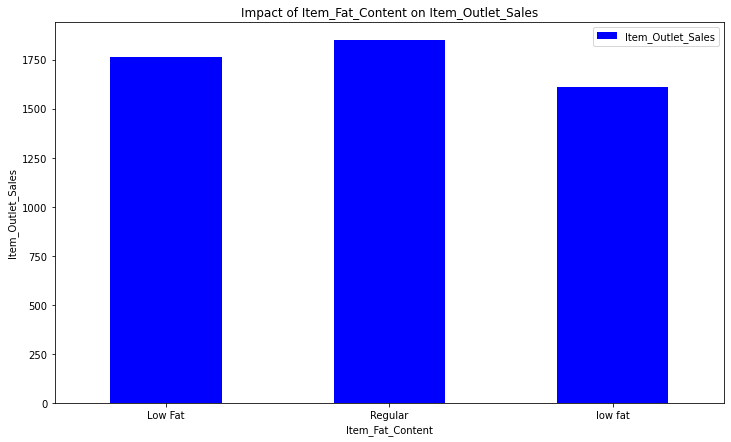

In [78]:
Item_Fat_Content_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue', figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [72]:
df['Item_Fat_Content'].value_counts()

Low Fat    5041
Regular    2833
LF          308
reg         114
low fat     104
Name: Item_Fat_Content, dtype: int64

In [85]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [86]:
df['Item_Fat_Content'].value_counts()

Low Fat    5453
Regular    2947
Name: Item_Fat_Content, dtype: int64

In [81]:
Train_data['Item_Fat_Content'] = Train_data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','Low Fat':'Low Fat'})

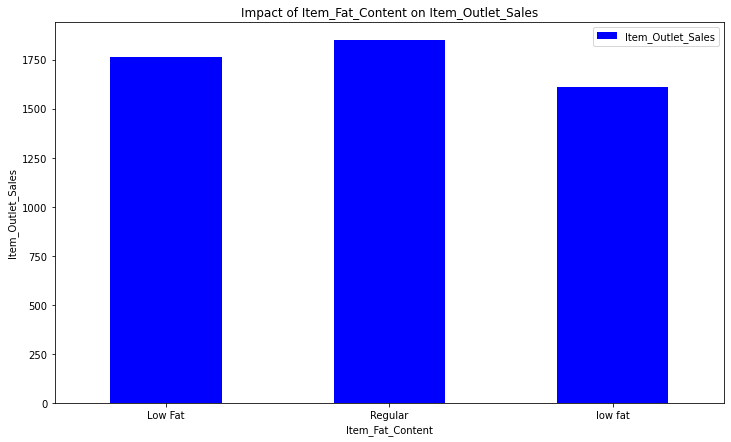

In [87]:
Item_Fat_Content_pivot = \
Train_data.pivot_table(index='Item_Fat_Content', values='Item_Outlet_Sales', aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar', color='blue', figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel('Item_Outlet_Sales')
plt.title('Impact of Item_Fat_Content on Item_Outlet_Sales')
plt.xticks(rotation=0)
plt.show()

In [88]:
Train_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.018928,0.020658,-0.007582,-0.002771
Item_Visibility,-0.018928,1.000000,-0.002969,-0.079886,-0.129110
Item_MRP,0.020658,-0.002969,1.000000,0.010286,0.571887
Outlet_Establishment_Year,-0.007582,-0.079886,0.010286,1.000000,-0.052432
Item_Outlet_Sales,-0.002771,-0.129110,0.571887,-0.052432,1.000000


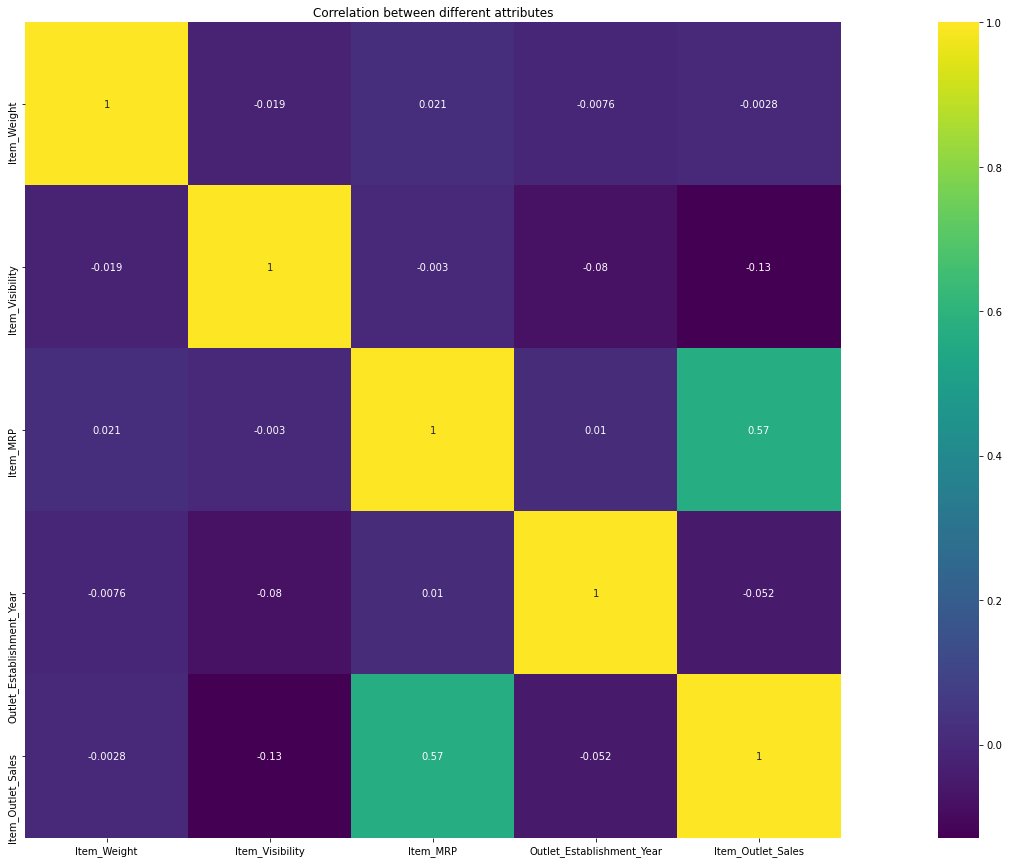

In [89]:
plt.figure(figsize=(35,15))
sns.heatmap(Train_data.corr(),vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

In [91]:
df['Item_Weight'].mean()

12.84582819446457

In [92]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

# Outlet_Size

In [94]:
df['Outlet_Size'].value_counts()

Medium    2742
Small     2337
High       921
Name: Outlet_Size, dtype: int64

In [95]:
df['Outlet_Size'].fillna('Medium',inplace=True)

In [96]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                1
Item_Visibility                 1
Item_Type                       1
Item_MRP                        1
Outlet_Identifier               2
Outlet_Establishment_Year       2
Outlet_Size                     0
Outlet_Location_Type            2
Outlet_Type                     2
Item_Outlet_Sales            3835
source                          0
dtype: int64

In [97]:
Train_data.shape

(4567, 13)

In [98]:
df.shape

(8401, 13)

# Item Visibility

In [99]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

496

In [100]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(),inplace=True)

# Outlet Years

In [101]:
df['Outlet_Establishment_Year'].value_counts()

1985.0    1427
2004.0     939
2002.0     931
2007.0     923
1987.0     921
1997.0     912
2009.0     904
1999.0     897
1998.0     545
Name: Outlet_Establishment_Year, dtype: int64

In [106]:
df['Outlet_Years']=2010 - df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    8399.000000
mean       12.129539
std         8.361326
min         1.000000
25%         6.000000
50%        11.000000
75%        23.000000
max        25.000000
Name: Outlet_Years, dtype: float64

# Item Types

In [107]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1197
Snack Foods              1181
Household                 938
Frozen Foods              861
Dairy                     666
Canned                    637
Baking Goods              637
Health and Hygiene        466
Meat                      434
Soft Drinks               428
Breads                    255
Hard Drinks               218
Others                    169
Starchy Foods             156
Breakfast                 110
Seafood                    47
Name: Item_Type, dtype: int64

# The item types are either food,drinks or non-consumables

In [109]:
df['Item_Identifier'].value_counts()

FDL39    10
DRZ24    10
NCO18     9
FDK43     9
FDU60     9
         ..
FDA35     2
NCL31     1
FDS36     1
FDN51     1
FDU19     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [110]:
df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [111]:
df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

df['New_Item_type'].value_counts()

Food              6039
Non-Consumable    1574
Drinks             788
Name: New_Item_type, dtype: int64

In [113]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_fat_Content'] = 'Non-Edible'
df['Item_fat_Content'].value_counts()

Non-Edible    1574
Name: Item_fat_Content, dtype: int64

In [114]:
item_visib_avg = df.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [115]:
item_visib_avg

,Item_Visibility
Item_Identifier,
DRA12,0.024607
DRA24,0.049455
DRA59,0.128016
DRB01,0.092608
DRB13,0.006727
...,...
NCZ30,0.027574
NCZ41,0.064355
NCZ42,0.010889


In [116]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [117]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,Item_fat_Content,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,3735.1380,train,11.0,Food,NaN,1.000061
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009.0,Medium,Tier 3,Supermarket Type2,443.4228,train,1.0,Drinks,NaN,0.884102
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999.0,Medium,Tier 1,Supermarket Type1,2097.2700,train,11.0,Food,NaN,0.817560
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998.0,Medium,Tier 3,Grocery Store,732.3800,train,12.0,Food,NaN,0.000000
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987.0,High,Tier 3,Supermarket Type1,994.7052,train,23.0,Non-Consumable,Non-Edible,0.000000


# Dealing with our Catrgorical variables

labe Encoder

In [1]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
list1=['Outlet_Identifier','Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

NameError: name 'df' is not defined

NameError: name 'df' is not defined

In [3]:
df

NameError: name 'df' is not defined

In [3]:
df =pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','New_Item_type','Outlet'])
df.dtypes

NameError: name 'pd' is not defined

In [7]:
df.head()

NameError: name 'df' is not defined

# Model Building

In [4]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

NameError: name 'df' is not defined

In [5]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

NameError: name 'df' is not defined

In [149]:
train.drop(['source'],axis=1,inplace=True)

In [150]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [151]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1) 
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

# Linear Regression

In [162]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)

lr.fit(X_train, y_train)

ValueError: could not convert string to float: 'Low Fat'

In [163]:
lr_pred = lr.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.